In [ ]:
import pandas as pd
df = pd.read_csv("/Assign_02_Dataset - main.csv")
df.head()

,duration_ms,energy,danceability,tempo,loudness,popularity_score
0,207320,0.653,0.717,106.966,-5.634,86
1,201661,0.488,0.752,136.041,-7.050,87
2,312820,0.730,0.834,155.008,-3.714,85
3,158040,0.479,0.760,89.911,-5.574,92
4,190947,0.904,0.579,82.014,-2.729,86


In [ ]:
from numpy import float64
data=df.select_dtypes(include=['float64', 'int64'])
data.head()

,duration_ms,energy,danceability,tempo,loudness,popularity_score
0,207320,0.653,0.717,106.966,-5.634,86
1,201661,0.488,0.752,136.041,-7.050,87
2,312820,0.730,0.834,155.008,-3.714,85
3,158040,0.479,0.760,89.911,-5.574,92
4,190947,0.904,0.579,82.014,-2.729,86


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


[593.9999999999999, 452.168231235492, 389.52894712313883, 339.3542863654236, 309.8806563078271, 273.18345938388893, 245.41593880591063, 237.20524372264342, 213.68982935786855]


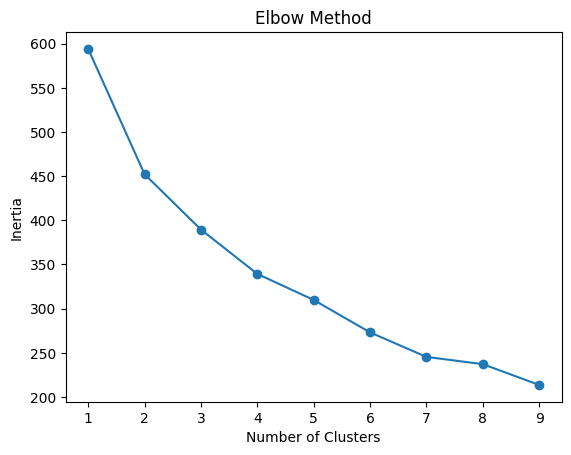

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

print(inertia)  # DEBUG LINE

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

df.head(10)


,duration_ms,energy,danceability,tempo,loudness,popularity_score,cluster
0,207320,0.653,0.717,106.966,-5.634,86,1
1,201661,0.488,0.752,136.041,-7.050,87,0
2,312820,0.730,0.834,155.008,-3.714,85,1
3,158040,0.479,0.760,89.911,-5.574,92,0
4,190947,0.904,0.579,82.014,-2.729,86,1
5,241107,0.625,0.335,150.277,-7.462,63,1
6,151933,0.598,0.240,202.082,-8.435,52,2
7,126267,0.472,0.589,67.196,-8.749,53,0
8,133547,0.398,0.665,140.456,-11.886,3,2
9,130973,0.428,0.757,119.813,-8.537,51,0


In [ ]:
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,duration_ms,energy,danceability,tempo,loudness,popularity_score
cluster,,,,,,
0,171107.190476,0.501524,0.737738,118.074762,-7.126000,71.976190
1,213298.860465,0.720302,0.571791,120.544256,-5.490256,69.372093
2,165684.000000,0.319843,0.544500,127.949643,-12.620429,44.500000


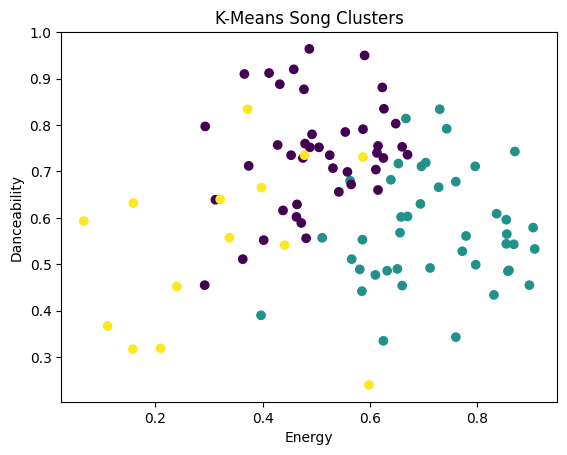

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['energy'], df['danceability'], c=df['cluster'], cmap='viridis')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('K-Means Song Clusters')
plt.show()
